<a href="https://www.kaggle.com/code/abdelazizsami/project-analyzing-river-thames-water-levels?scriptVersionId=198956800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing River Thames Water Levels
Time series data is everywhere, from watching your stock portfolio to monitoring climate change, and even live-tracking as local cases of a virus become a global pandemic. In this project, you’ll work with a time series that tracks the tide levels of the Thames River. You’ll first load the data and inspect it data visually, and then perform calculations on the dataset to generate some summary statistics. You’ll end by reducing the time series to its component attributes and analyzing them. 

The original dataset is available from the British Oceanographic Data Center.

Here's a map of the locations of the tidal meters along the River Thames in London.

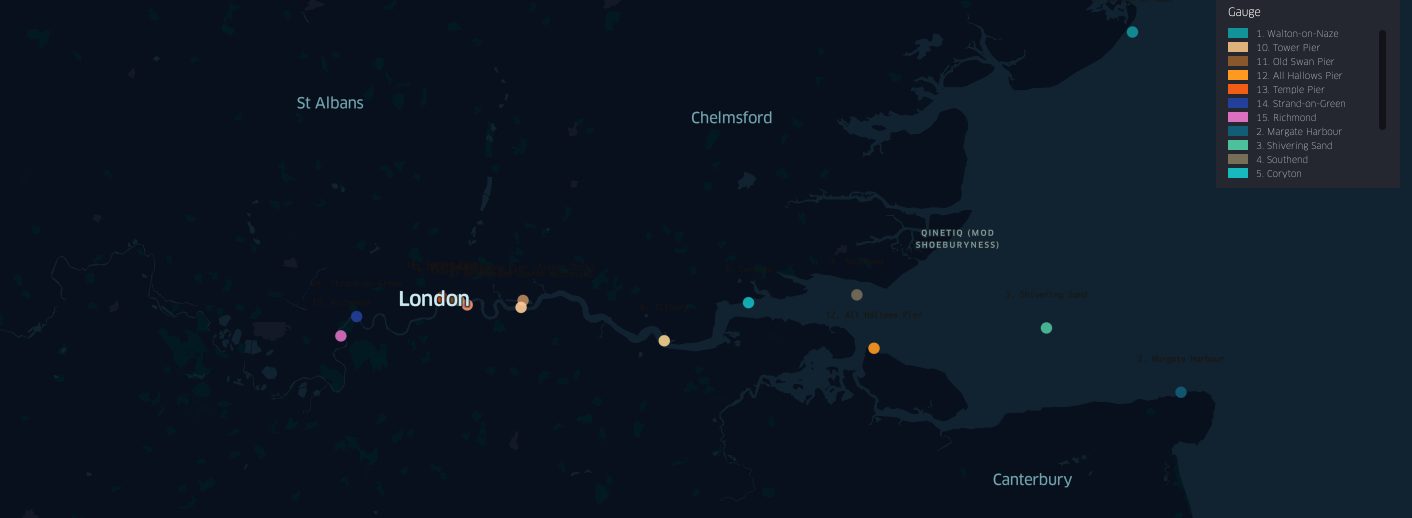

The provided datasets are in the `data` folder in this workspace. For this project, you will work with one of these files, `10-11_London_Bridge.txt`, which contains comma separated values for water levels in the Thames River at the London Bridge. After you've finished the project, you can use your same code to analyze data from the other files (at other spots in the UK where tidal data is collected) if you'd like. 

The TXT file contains data for three variables, described in the table below. 

| Variable Name | Description | Format |
| ------------- | ----------- | ------ |
| Date and time | Date and time of measurement to GMT. Note the tide gauge is accurate to one minute. | dd/mm/yyyy hh:mm:ss |
| Water level | High or low water level measured by tide meter. Tide gauges are accurate to 1 centimetre. | metres (Admiralty Chart Datum (CD), Ordnance Datum Newlyn (ODN or Trinity High Water (THW)) | 
| Flag | High water flag = 1, low water flag = 0 | Categorical (0 or 1) |



In [1]:
# We've imported your first Python package for you, along with a function you will need called IQR
import pandas as pd               

def IQR(column): 
    """ Calculates the interquartile range (IQR) for a given DataFrame column using the quantile method """
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

# Package imports
import pandas as pd                

def IQR(column): 
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

# Load the data from London Bridge
lb = pd.read_csv('/kaggle/input/analyzing-river-thames-water-levels/10-11_London_Bridge.txt') # Comma-separated .txt file

# Take only the first three columns
df = lb.iloc[:, :3]

# Rename columns
df.columns = ['datetime', 'water_level', 'is_high_tide']

# Convert to datetime
# df['datetime'] = pd.to_datetime(df['datetime'])
# Convert to datetime with dayfirst=True
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)

# Convert to float
df['water_level'] = df.water_level.astype(float)

# Create extra month and year columns for easy access
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Filter df for high and low tide
tide_high = df[df['is_high_tide'] == 1]
tide_low = df[df['is_high_tide'] == 0]

# Create summary statistics
high_statistics = tide_high['water_level'].agg(['mean', 'median', IQR])
low_statistics = tide_low['water_level'].agg(['mean', 'median', IQR])

# Calculate ratio of high tide days
all_high_days = tide_high.groupby('year')['water_level'].count()
very_high_days = tide_high[tide_high['water_level'] > tide_high['water_level'].quantile(0.90)].groupby('year')['water_level'].count()
very_high_ratio = (very_high_days/all_high_days).reset_index()

# Calculate ratio of low tide days
all_low_days = tide_low.groupby('year')['water_level'].count()
very_low_days = tide_low[tide_low['water_level'] < tide_low['water_level'].quantile(0.10)].groupby('year')['water_level'].count()
very_low_ratio = (very_low_days/all_low_days).reset_index()

solution = {'high_statistics': high_statistics, 'low_statistics': low_statistics, 'very_high_ratio': very_high_ratio, 'very_low_ratio':very_low_ratio}
print(solution)

{'high_statistics': mean      3.318373
median    3.352600
IQR       0.743600
Name: water_level, dtype: float64, 'low_statistics': mean     -2.383737
median   -2.412900
IQR       0.538200
Name: water_level, dtype: float64, 'very_high_ratio':     year  water_level
0   1911     0.004098
1   1912     0.032316
2   1913     0.082212
3   1914     0.055313
4   1915     0.045045
..   ...          ...
80  1991     0.096317
81  1992     0.103253
82  1993     0.145923
83  1994     0.150355
84  1995     0.170213

[85 rows x 2 columns], 'very_low_ratio':     year  water_level
0   1911     0.060606
1   1912     0.066667
2   1913     0.022388
3   1914     0.039017
4   1915     0.033435
..   ...          ...
80  1991     0.150355
81  1992     0.107496
82  1993     0.112696
83  1994     0.106383
84  1995     0.107801

[85 rows x 2 columns]}
